Первые несколько строк данных:
   age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
0   56        152         65        69.6           117.0          NaN   
1   69        186         95        60.8           114.8          7.5   
2   46        192        103        61.4           116.4          NaN   
3   32        189         83        60.2           130.1          7.0   
4   60        175         99        58.1           115.8          8.0   

   nutrition_quality  activity_index smokes gender  is_fit  
0               2.37            3.97     no      F       1  
1               8.77            3.19      0      F       1  
2               8.20            2.03      0      F       0  
3               6.18            3.68      0      M       1  
4               9.95            4.83    yes      F       1  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Co

/tmp/ipython-input-2698189119.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sleep_hours'].fillna(df['sleep_hours'].median(), inplace=True)
/tmp/ipython-input-2698189119.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smokes'] = df['smokes'].replace({'yes': 1, 'no': 0, '1': 1, '0'

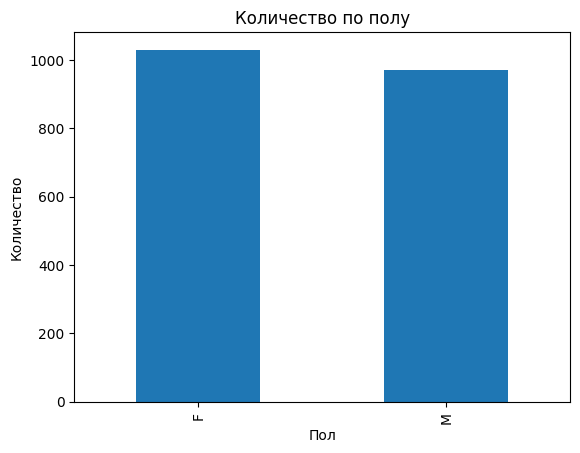

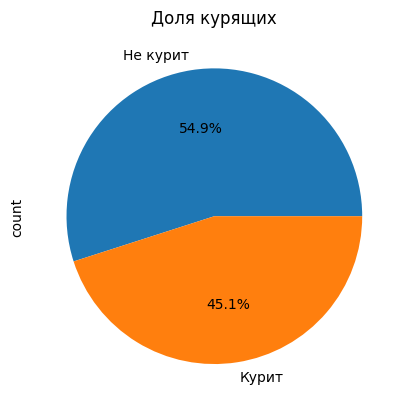


Аггрегированная информация по gender:
        weight_kg        height_cm     
             mean  max        mean  max
gender                                 
F       83.823301  250  174.878641  199
M       83.240206  250  174.165979  199

Данные с новым признаком BMI:
   age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
0   56        152         65        69.6           117.0          7.5   
1   69        186         95        60.8           114.8          7.5   
2   46        192        103        61.4           116.4          7.5   
3   32        189         83        60.2           130.1          7.0   
4   60        175         99        58.1           115.8          8.0   

   nutrition_quality  activity_index  smokes gender  is_fit        bmi  
0               2.37            3.97       0      F       1  28.133657  
1               8.77            3.19       0      F       1  27.459822  
2               8.20            2.03       0      F       0  27.940538  

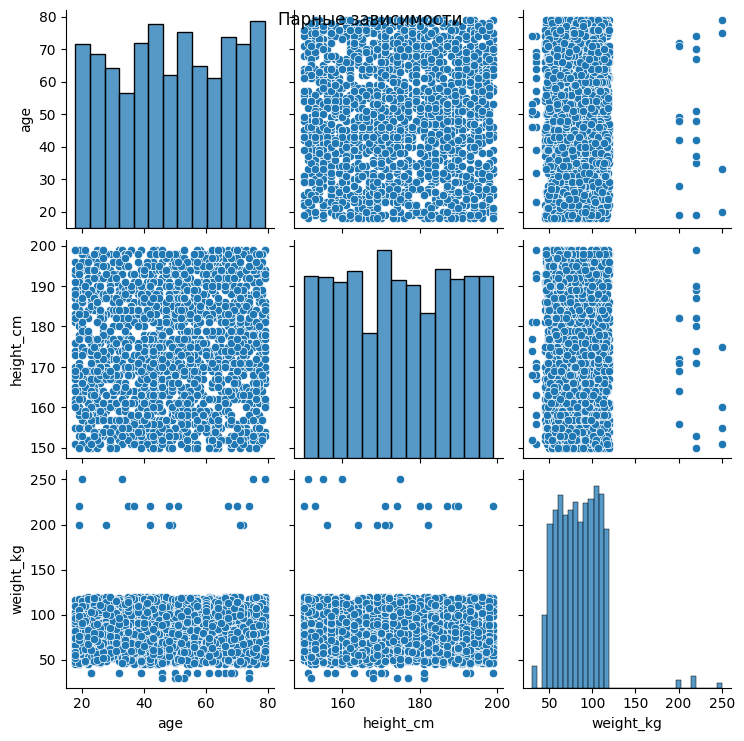

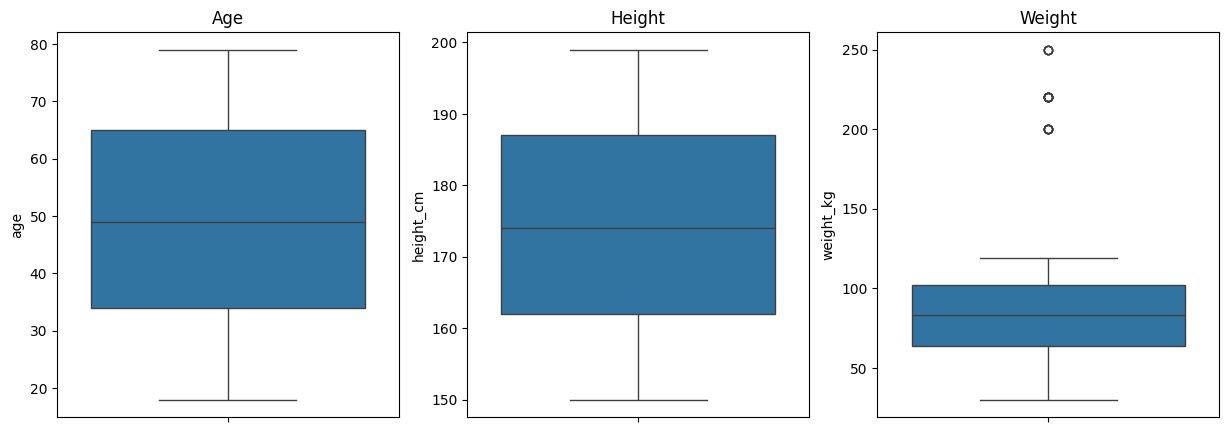


Выбросы в weight_kg:
      age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
263    49        182        200        71.9           122.0          5.9   
268    79        160        250        77.5           141.9          7.7   
400    42        182        220        63.4           103.7          8.4   
487    35        153        220        54.9           116.8          8.9   
670    75        175        250        57.2            98.1          8.9   
711    19        164        200        61.2           141.1          8.5   
763    72        172        200        67.5           113.8          6.3   
928    48        171        200        49.7           103.0          6.9   
933    20        151        250        60.7           118.2          8.6   
968    37        189        220        66.6           130.1          7.5   
1086   67        180        220        76.9           119.6          6.8   
1229   42        156        200        56.3           109.6       

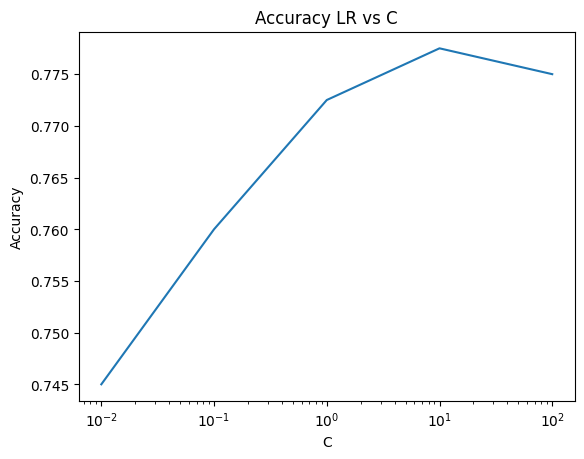

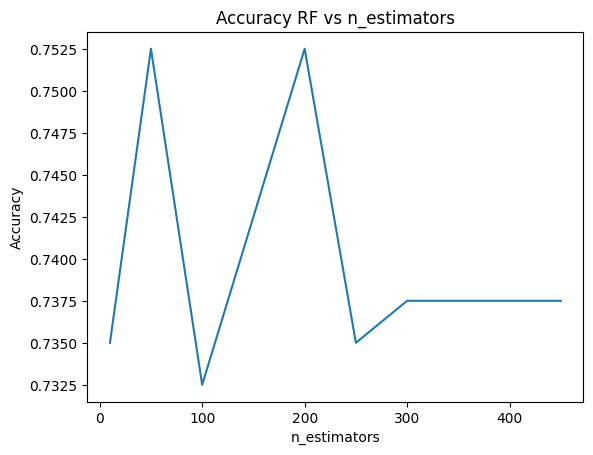

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV


df = pd.read_csv("fitness_dataset.csv")
print("Первые несколько строк данных:")
print(df.head())

print("\nИнформация о данных:")
print(df.info())


df['sleep_hours'].fillna(df['sleep_hours'].median(), inplace=True)
print("\nПосле обработки NaN:")
print(df.info())

df['smokes'] = df['smokes'].replace({'yes': 1, 'no': 0, '1': 1, '0': 0}).astype(int)


print("\nВсе индивиды мужского пола:")
print(df[df['gender'] == 'M'])

print("\nВсе, кто курит:")
print(df[df['smokes'] == 1])

print("\nСредний возраст:", df['age'].mean())

print("Средняя высота:", df['height_cm'].mean())

print("\n5 индивидов с максимальным весом:")
print(df.nlargest(5, 'weight_kg'))

n = int(len(df) * 0.1)
print("\n10% индивидов с минимальным пульсом:")
print(df.nsmallest(n, 'heart_rate'))

gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='bar')
plt.title('Количество по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

smokes_counts = df['smokes'].value_counts()
smokes_counts.plot(kind='pie', labels=['Не курит', 'Курит'], autopct='%1.1f%%')
plt.title('Доля курящих')
plt.show()

grouped = df.groupby('gender').agg({
    'weight_kg': ['mean', 'max'],
    'height_cm': ['mean', 'max']
})
print("\nАггрегированная информация по gender:")
print(grouped)

df['bmi'] = df['weight_kg'] / (df['height_cm'] / 100) ** 2
print("\nДанные с новым признаком BMI:")
print(df.head())

sns.pairplot(df[['age', 'height_cm', 'weight_kg']])
plt.suptitle('Парные зависимости')
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=df['age'], ax=axes[0])
axes[0].set_title('Age')
sns.boxplot(y=df['height_cm'], ax=axes[1])
axes[1].set_title('Height')
sns.boxplot(y=df['weight_kg'], ax=axes[2])
axes[2].set_title('Weight')
plt.show()



outliers_mask = df['weight_kg'] > 125
print("\nВыбросы в weight_kg:")
print(df[outliers_mask])

max_non_outlier = df[~outliers_mask]['weight_kg'].max()
df.loc[outliers_mask, 'weight_kg'] = max_non_outlier

print("\nПосле замены выбросов:")
print(df['weight_kg'].describe())


features = ['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure', 'sleep_hours',
            'nutrition_quality', 'activity_index', 'smokes', 'gender', 'bmi']

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

numerical_features = ['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure', 'sleep_hours',
                      'nutrition_quality', 'activity_index', 'bmi']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

X = df[features]
y = df['is_fit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nLogisticRegression: Accuracy:", accuracy_score(y_test, y_pred_lr), "F1:", f1_score(y_test, y_pred_lr))
print("RandomForestClassifier: Accuracy:", accuracy_score(y_test, y_pred_rf), "F1:", f1_score(y_test, y_pred_rf))

c_values = [0.01, 0.1, 1, 10, 100]
acc_lr = []
for c in c_values:
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    acc_lr.append(accuracy_score(y_test, y_pred))
plt.plot(c_values, acc_lr)
plt.title('Accuracy LR vs C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

n_est = [10, 50, 100, 200, 250, 300, 450]
acc_rf = []
for n in n_est:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc_rf.append(accuracy_score(y_test, y_pred))


plt.plot(n_est, acc_rf)
plt.title('Accuracy RF vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()